In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,classification_report,mean_squared_error, mean_absolute_error

In [34]:
df=pd.read_csv(r"C:\Users\user\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Data_Train.csv")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Checking null values

In [3]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## Checking data type

In [4]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## Treating nulls

In [6]:
df[df['Route'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [13]:
df[(df['Source']=='Delhi') & (df['Destination']=='Cochin') & (df['Airline']=='Air India') & (df['Duration']=='23h 40m')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1336,Air India,9/03/2019,Delhi,Cochin,DEL ? HYD ? MAA ? COK,09:45,09:25 10 Mar,23h 40m,2 stops,No info,10660
1616,Air India,24/05/2019,Delhi,Cochin,DEL ? MAA ? COK,09:45,09:25 25 May,23h 40m,1 stop,No info,7480
1679,Air India,3/06/2019,Delhi,Cochin,DEL ? HYD ? MAA ? COK,09:45,09:25 04 Jun,23h 40m,2 stops,No info,10975
1862,Air India,27/06/2019,Delhi,Cochin,DEL ? HYD ? MAA ? COK,09:45,09:25 28 Jun,23h 40m,2 stops,No info,10975
2343,Air India,15/05/2019,Delhi,Cochin,DEL ? HYD ? MAA ? COK,09:45,09:25 16 May,23h 40m,2 stops,No info,10975
2554,Air India,15/05/2019,Delhi,Cochin,DEL ? MAA ? COK,09:45,09:25 16 May,23h 40m,1 stop,No info,7480
3272,Air India,27/03/2019,Delhi,Cochin,DEL ? HYD ? MAA ? COK,09:45,09:25 28 Mar,23h 40m,2 stops,No info,7090
3595,Air India,18/05/2019,Delhi,Cochin,DEL ? MAA ? COK,09:45,09:25 19 May,23h 40m,1 stop,No info,8372
4280,Air India,1/04/2019,Delhi,Cochin,DEL ? MAA ? COK,09:45,09:25 02 Apr,23h 40m,1 stop,No info,5117
4351,Air India,27/06/2019,Delhi,Cochin,DEL ? MAA ? COK,09:45,09:25 28 Jun,23h 40m,1 stop,No info,7480


Looking at the above data we can observe that we could not draw nay conclusion as with 2stops also sometimes the price is low and with 1 stop sometimes the price is high so better we impute the null values by deleting this row.

There will be negligible data loss as there are 10000+ rows and we are deleting only 1.

## Deleting null value row

In [35]:
df=df.drop(df.index[9039])
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Checking relation between features and label

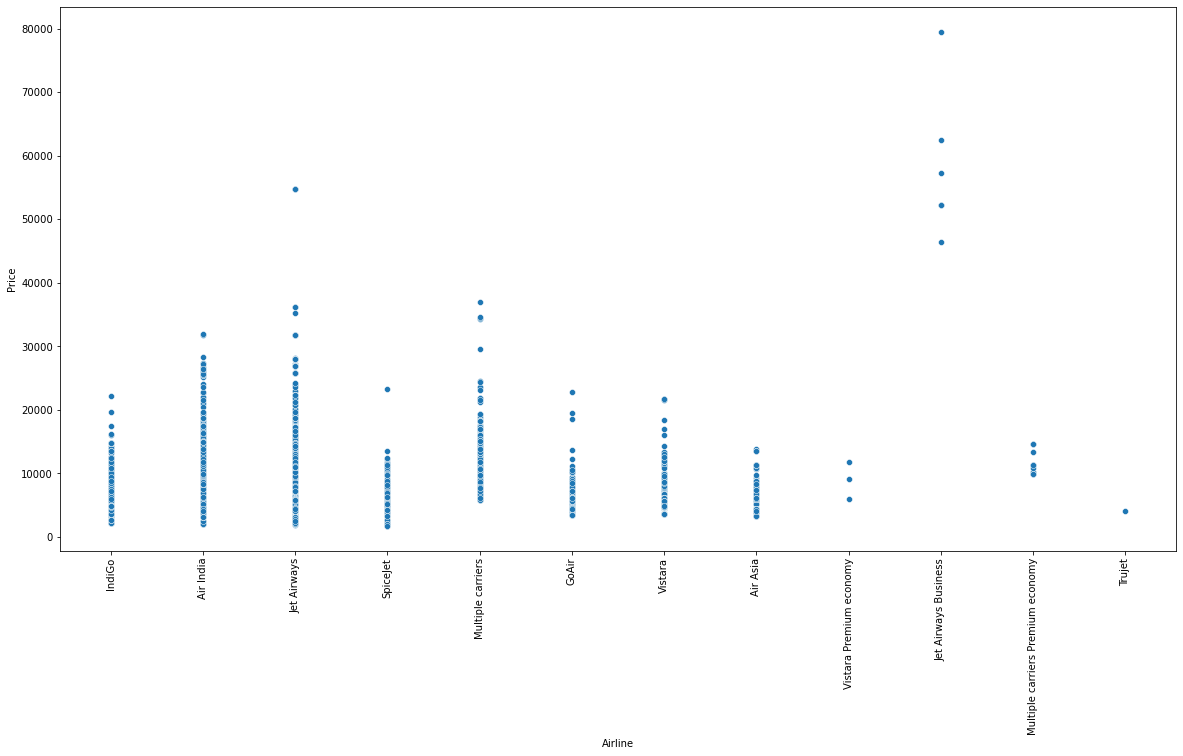

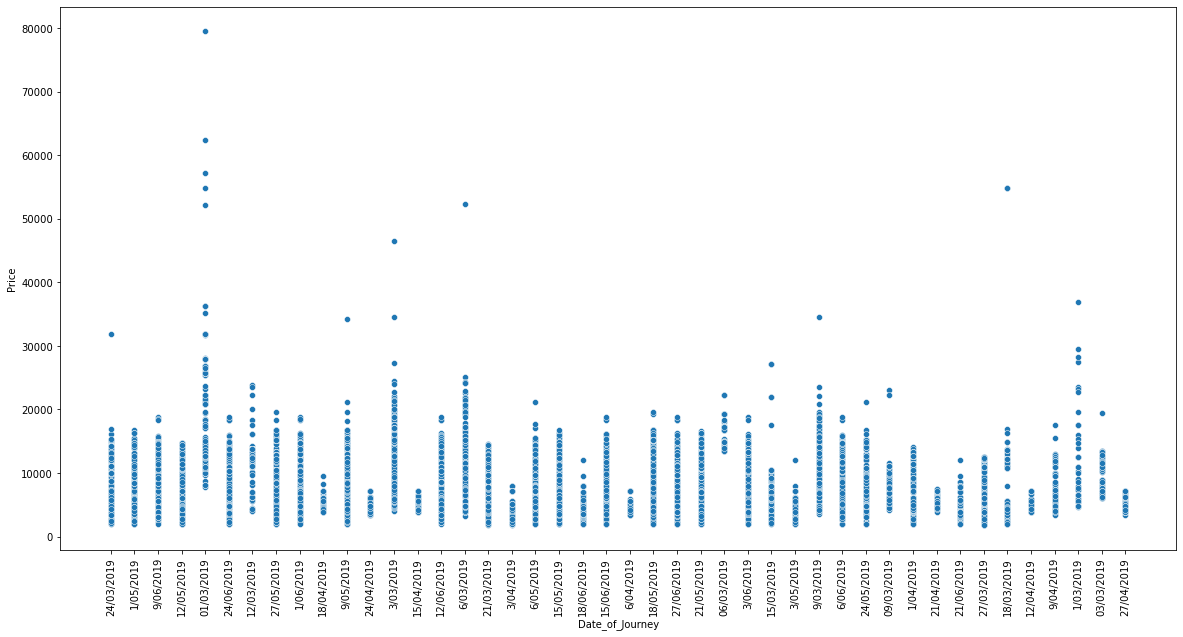

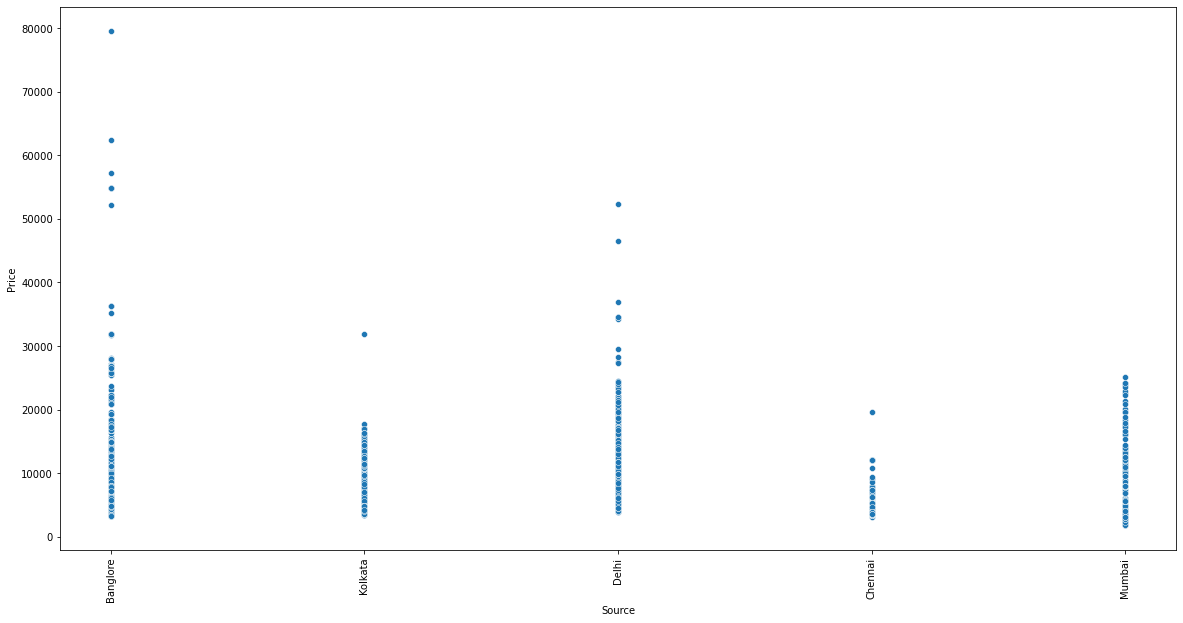

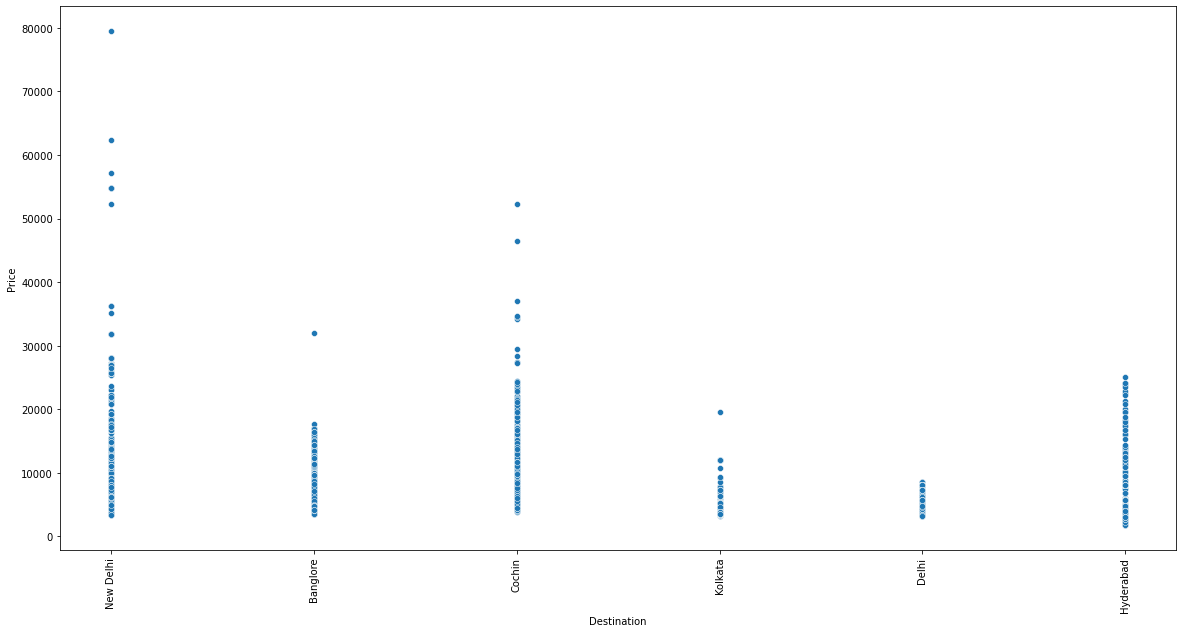

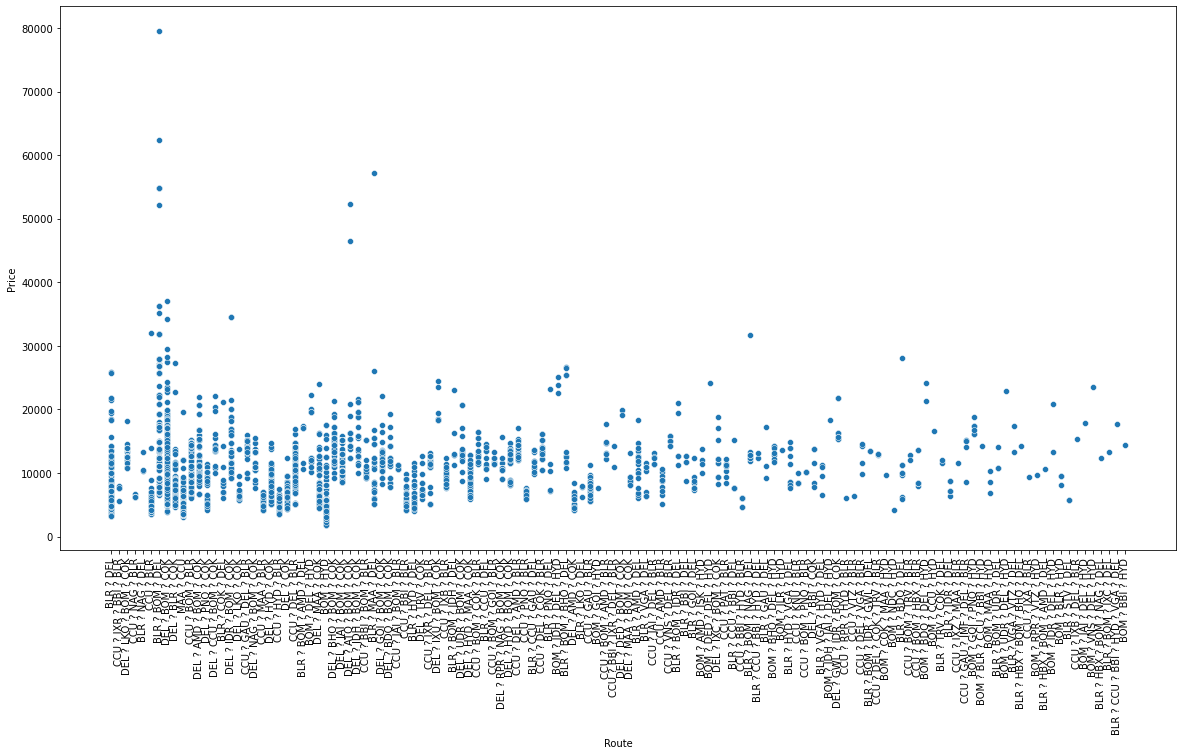

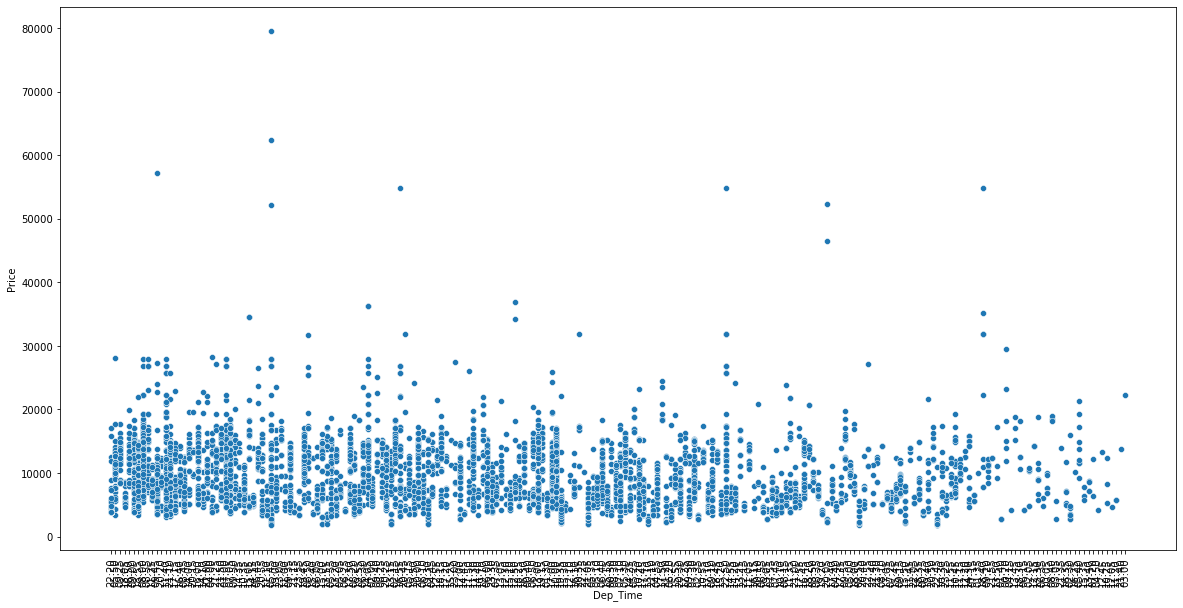

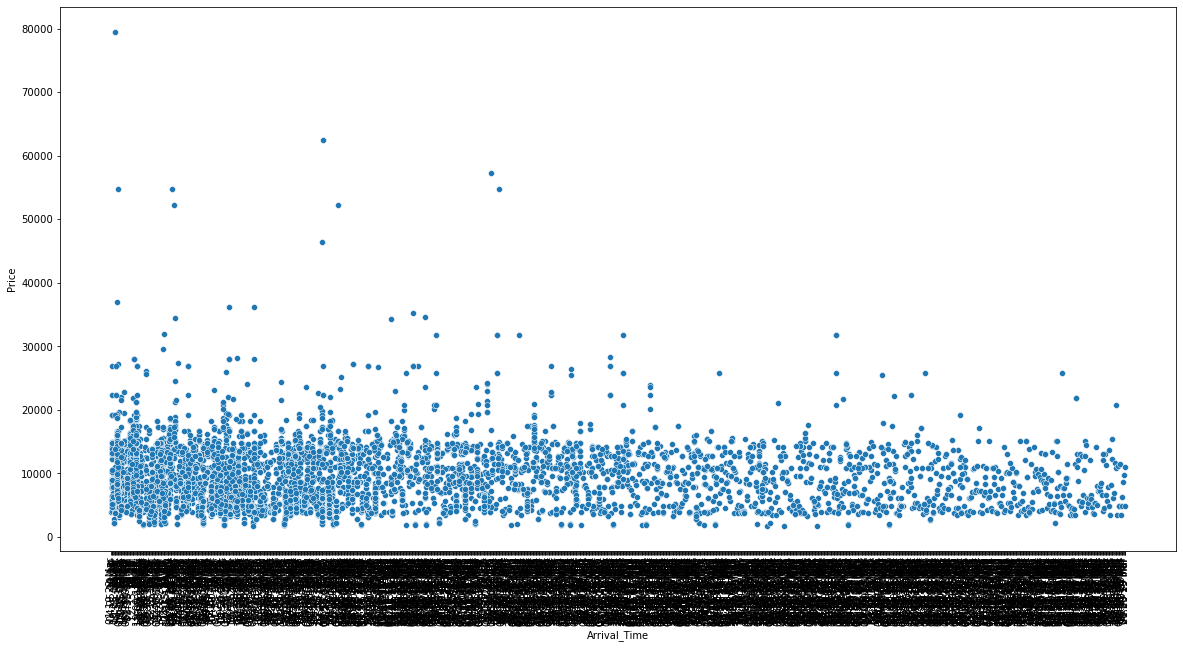

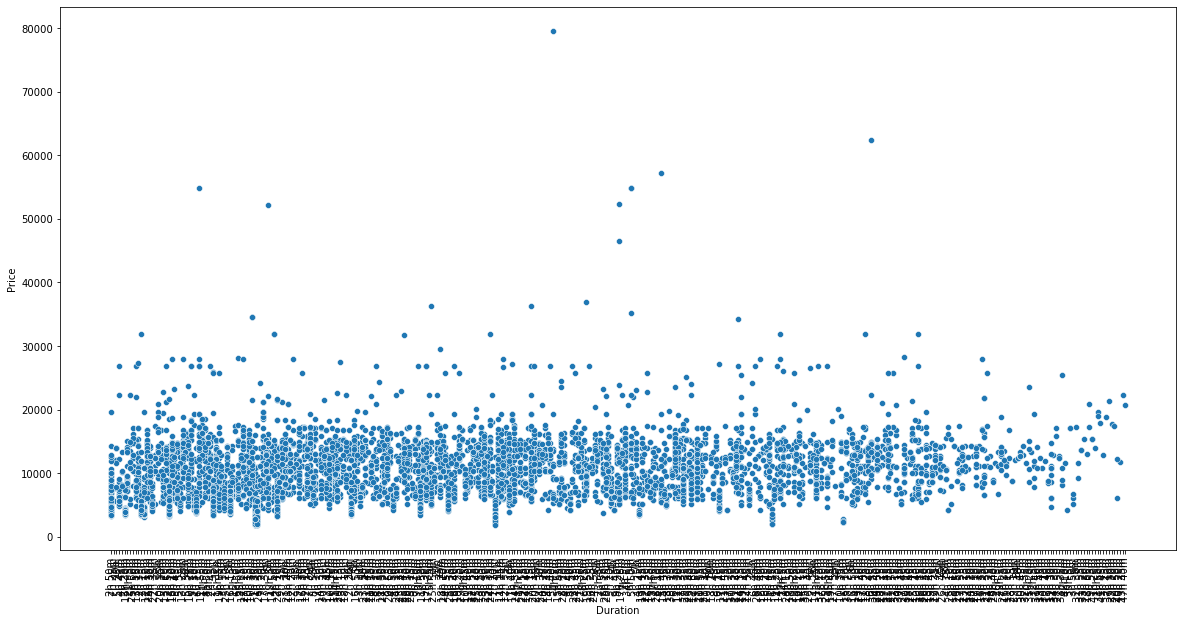

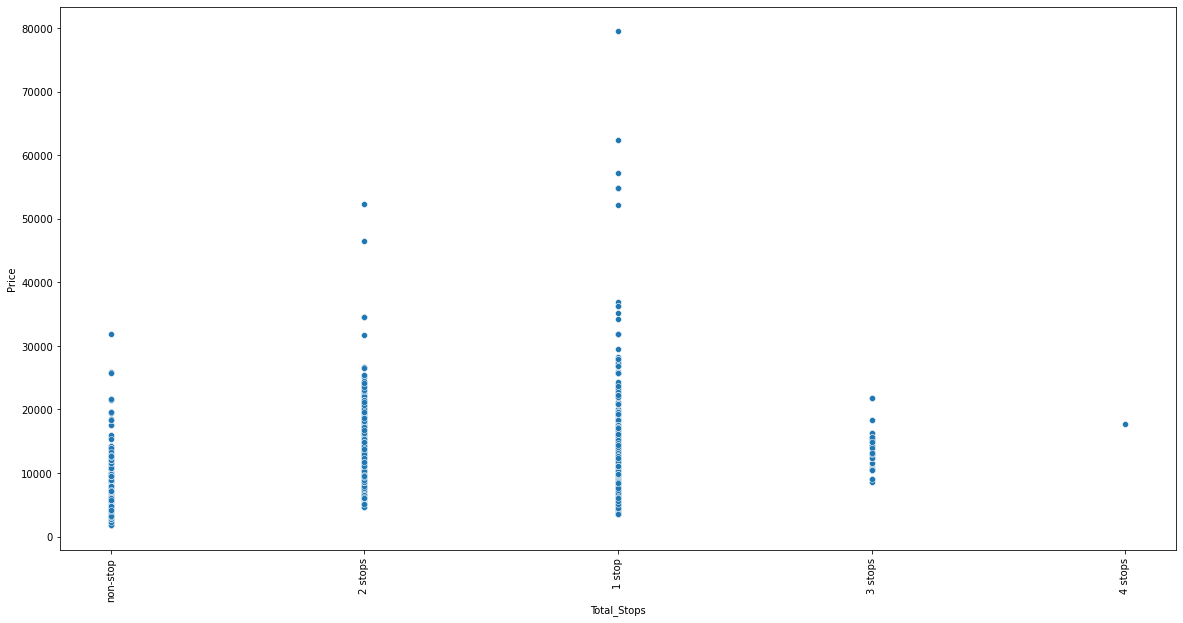

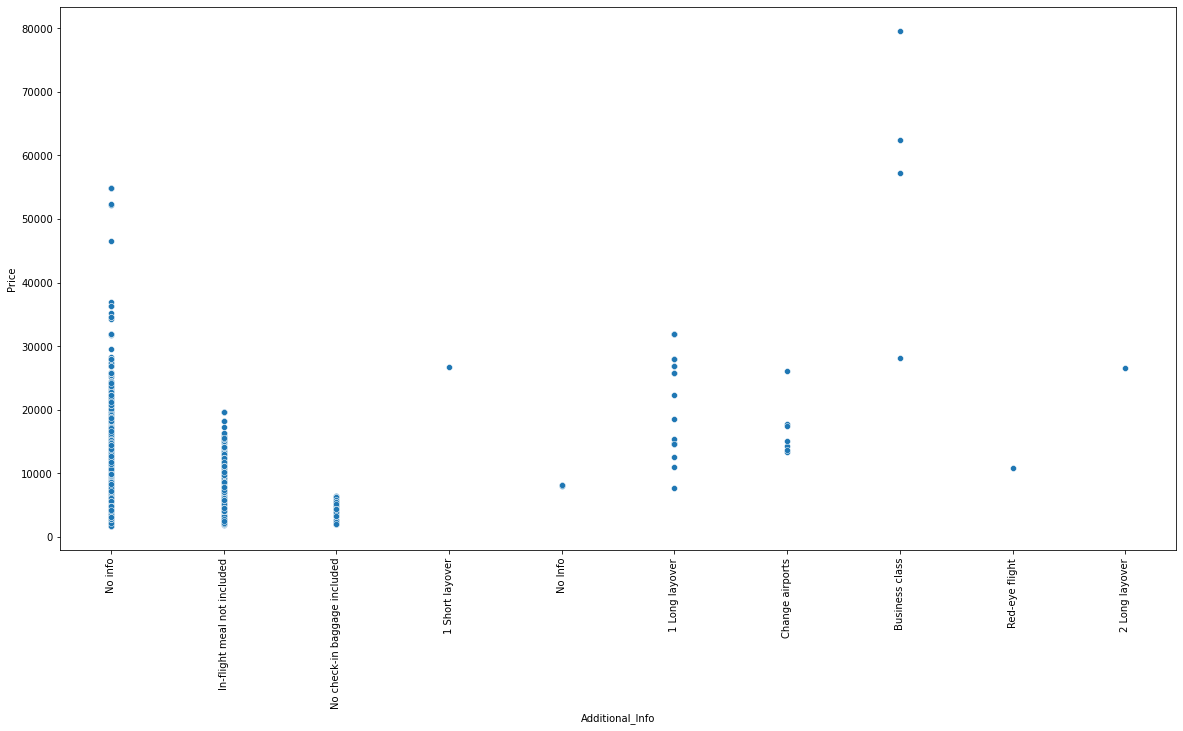

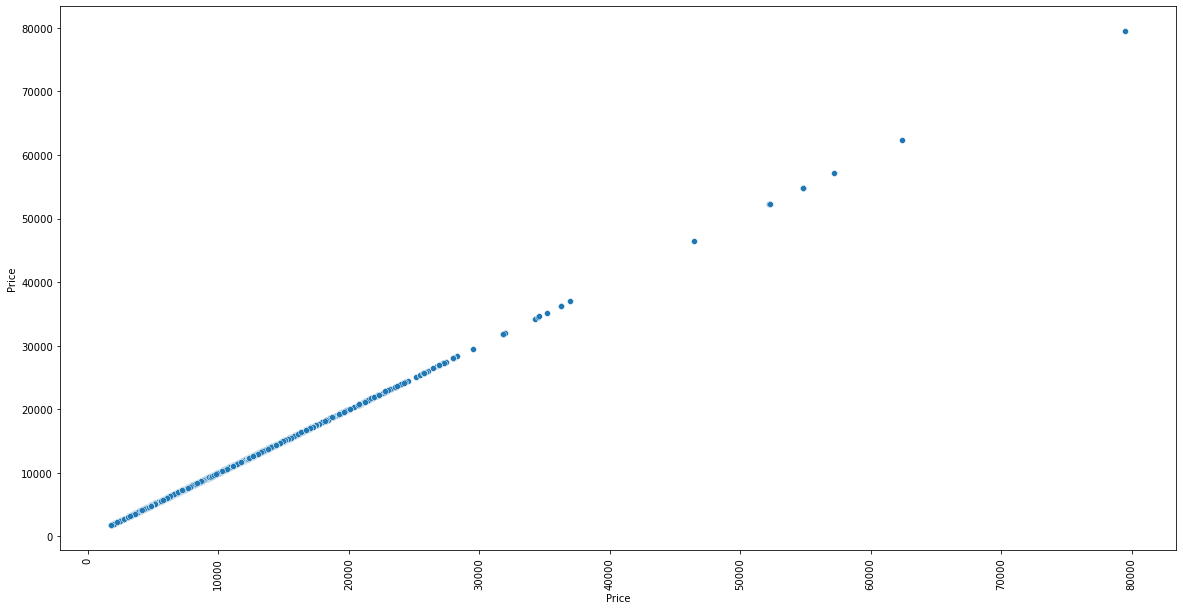

In [12]:
col=df.columns
#Plotting Scatter plot for each feature

for i in col:
    plt.figure(figsize=(20,10))
    a=sns.scatterplot(x=df[i],y=df['Price'],data=df)
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

Observation: We can observe that jetAirways Business and Jet Airways flight has the highest prices. We could observe that flight prices increases on weekends mostly fridays and saturdays. Flight prices are highest if the source city is banglore and delhi and if the destination city is new delhi and cochin. Flight prices are highest for 1 stop flights.

## Feature Engineering

We will split Date_of_Journey,Dep_Time,Arrival_Time and convert Duration into minutes.

In [36]:
#Date_of_Journey
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['journey_date'] = df['Date_of_Journey'].dt.day
df['journey_month'] = df['Date_of_Journey'].dt.month
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [37]:
df=df.drop(['Date_of_Journey'],axis=1)
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9
10679,Air India,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1


In [38]:
#Dep_Time
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
df['Dept_hour'] = df['Dep_Time'].dt.hour
df['Dept_min'] = df['Dep_Time'].dt.minute
#Arrival_Time
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])
df['arrival_hour'] = df['Arrival_Time'].dt.hour
df['arrival_min'] = df['Arrival_Time'].dt.minute
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,Dept_hour,Dept_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2022-08-25 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2022-08-25 05:50:00,2022-08-25 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2022-08-25 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,2022-08-25 18:05:00,2022-08-25 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,2022-08-25 16:50:00,2022-08-25 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,2022-08-25 19:55:00,2022-08-25 22:25:00,2h 30m,non-stop,No info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU ? BLR,2022-08-25 20:45:00,2022-08-25 23:20:00,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,2022-08-25 08:20:00,2022-08-25 11:20:00,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR ? DEL,2022-08-25 11:30:00,2022-08-25 14:10:00,2h 40m,non-stop,No info,12648,3,1,11,30,14,10


In [39]:
df=df.drop(['Dep_Time','Arrival_Time'],axis=1)


In [40]:
#Duration
df['Duration']=df['Duration'].str.replace("h","*60")
df['Duration']=df['Duration'].str.replace("m","*1")
df['Duration']=df['Duration'].str.replace(" ","+")
df['Duration']=df['Duration'].apply(eval)
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,Dept_hour,Dept_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,445,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,1140,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,325,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,285,1 stop,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,150,non-stop,No info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU ? BLR,155,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,180,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR ? DEL,160,non-stop,No info,12648,3,1,11,30,14,10


In [40]:
# Checking the data types
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Duration            int64
Total_Stops        object
Additional_Info    object
Price               int64
journey_date        int64
journey_month       int64
Dept_hour           int64
Dept_min            int64
arrival_hour        int64
arrival_min         int64
dtype: object

## Encoding

In [41]:
category=['Airline','Source','Destination','Route','Total_Stops','Additional_Info']
oe=OrdinalEncoder()
for i in category:
    df1=oe.fit_transform(df[[i]])
    df[i]=df1
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,Dept_hour,Dept_min,arrival_hour,arrival_min
0,3.0,0.0,5.0,18.0,170,4.0,8.0,3897,24,3,22,20,1,10
1,1.0,3.0,0.0,84.0,445,1.0,8.0,7662,5,1,5,50,13,15
2,4.0,2.0,1.0,118.0,1140,1.0,8.0,13882,6,9,9,25,4,25
3,3.0,3.0,0.0,91.0,325,0.0,8.0,6218,5,12,18,5,23,30
4,3.0,0.0,5.0,29.0,285,0.0,8.0,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,64.0,150,4.0,8.0,4107,4,9,19,55,22,25
10679,1.0,3.0,0.0,64.0,155,4.0,8.0,4145,27,4,20,45,23,20
10680,4.0,0.0,2.0,18.0,180,4.0,8.0,7229,27,4,8,20,11,20
10681,10.0,0.0,5.0,18.0,160,4.0,8.0,12648,3,1,11,30,14,10


## Describing the data

In [42]:
df.describe()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,Dept_hour,Dept_min,arrival_hour,arrival_min
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,1.952256,1.436154,74.820165,643.020502,1.458248,7.392998,9087.214567,12.682925,5.534731,12.491013,24.409287,13.349186,24.690601
std,2.352090,1.177276,1.474845,36.729039,507.830133,1.806320,1.214254,4611.548810,8.803800,2.987626,5.748820,18.767801,6.859317,16.506808
min,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,48.000000,170.000000,0.000000,8.000000,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,4.000000,2.000000,1.000000,73.000000,520.000000,0.000000,8.000000,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,4.000000,3.000000,2.000000,104.000000,930.000000,4.000000,8.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,11.000000,4.000000,5.000000,127.000000,2860.000000,4.000000,9.000000,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000


## Finding correlation between features

In [43]:
df.corr().abs()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,Dept_hour,Dept_min,arrival_hour,arrival_min
Airline,1.000000,0.013397,0.018446,0.025214,0.159651,0.035973,0.060748,0.039565,0.031118,0.007900,0.035269,0.059922,0.007567,0.071092
Source,0.013397,1.000000,0.592576,0.403412,0.161886,0.225605,0.022109,0.015999,0.007563,0.063052,0.059047,0.056998,0.025635,0.021040
Destination,0.018446,0.592576,1.000000,0.461176,0.257352,0.337872,0.026821,0.071122,0.052102,0.105035,0.072997,0.127931,0.039729,0.017196
Route,0.025214,0.403412,0.461176,1.000000,0.288773,0.437749,0.035152,0.164149,0.096601,0.042194,0.075002,0.068071,0.013898,0.173352
Duration,0.159651,0.161886,0.257352,0.288773,1.000000,0.602282,0.167870,0.506480,0.038360,0.055136,0.002088,0.019099,0.051531,0.069663
Total_Stops,0.035973,0.225605,0.337872,0.437749,0.602282,1.000000,0.164054,0.571221,0.043844,0.056514,0.039224,0.048901,0.095650,0.175980
Additional_Info,0.060748,0.022109,0.026821,0.035152,0.167870,0.164054,1.000000,0.065463,0.019416,0.009105,0.050983,0.019392,0.026204,0.041310
Price,0.039565,0.015999,0.071122,0.164149,0.506480,0.571221,0.065463,1.000000,0.165448,0.010705,0.006799,0.024458,0.024244,0.086155
journey_date,0.031118,0.007563,0.052102,0.096601,0.038360,0.043844,0.019416,0.165448,1.000000,0.264896,0.002301,0.016433,0.002176,0.021423
journey_month,0.007900,0.063052,0.105035,0.042194,0.055136,0.056514,0.009105,0.010705,0.264896,1.000000,0.028189,0.002136,0.004329,0.025786


<AxesSubplot:>

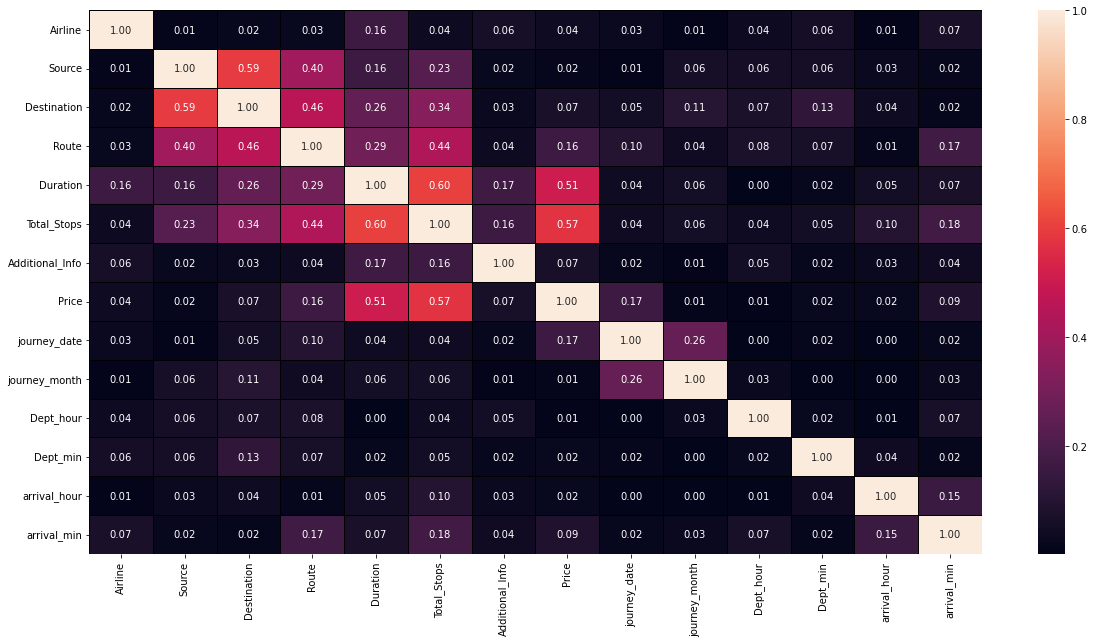

In [44]:
# Plotting heat map for better analysis
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

Observation: multicollinearity could exists in this dataset, in order to cross check it lets find out its vif score.

In [45]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
vif

,vif,features
0,3.760996,Airline
1,5.703455,Source
2,3.196281,Destination
3,7.769562,Route
4,4.393000,Duration
5,3.531524,Total_Stops
6,25.149829,Additional_Info
7,7.783628,Price
8,3.267563,journey_date
9,4.521363,journey_month


We could observe that Additional_Info feature vif score is much higher than 10 so we need to drop this feature to remove multicollinearity.

In [42]:
df=df.drop(['Additional_Info'],axis=1)
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,journey_date,journey_month,Dept_hour,Dept_min,arrival_hour,arrival_min
0,3.0,0.0,5.0,18.0,170,4.0,3897,24,3,22,20,1,10
1,1.0,3.0,0.0,84.0,445,1.0,7662,5,1,5,50,13,15
2,4.0,2.0,1.0,118.0,1140,1.0,13882,6,9,9,25,4,25
3,3.0,3.0,0.0,91.0,325,0.0,6218,5,12,18,5,23,30
4,3.0,0.0,5.0,29.0,285,0.0,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,64.0,150,4.0,4107,4,9,19,55,22,25
10679,1.0,3.0,0.0,64.0,155,4.0,4145,27,4,20,45,23,20
10680,4.0,0.0,2.0,18.0,180,4.0,7229,27,4,8,20,11,20
10681,10.0,0.0,5.0,18.0,160,4.0,12648,3,1,11,30,14,10


## Checking outliers

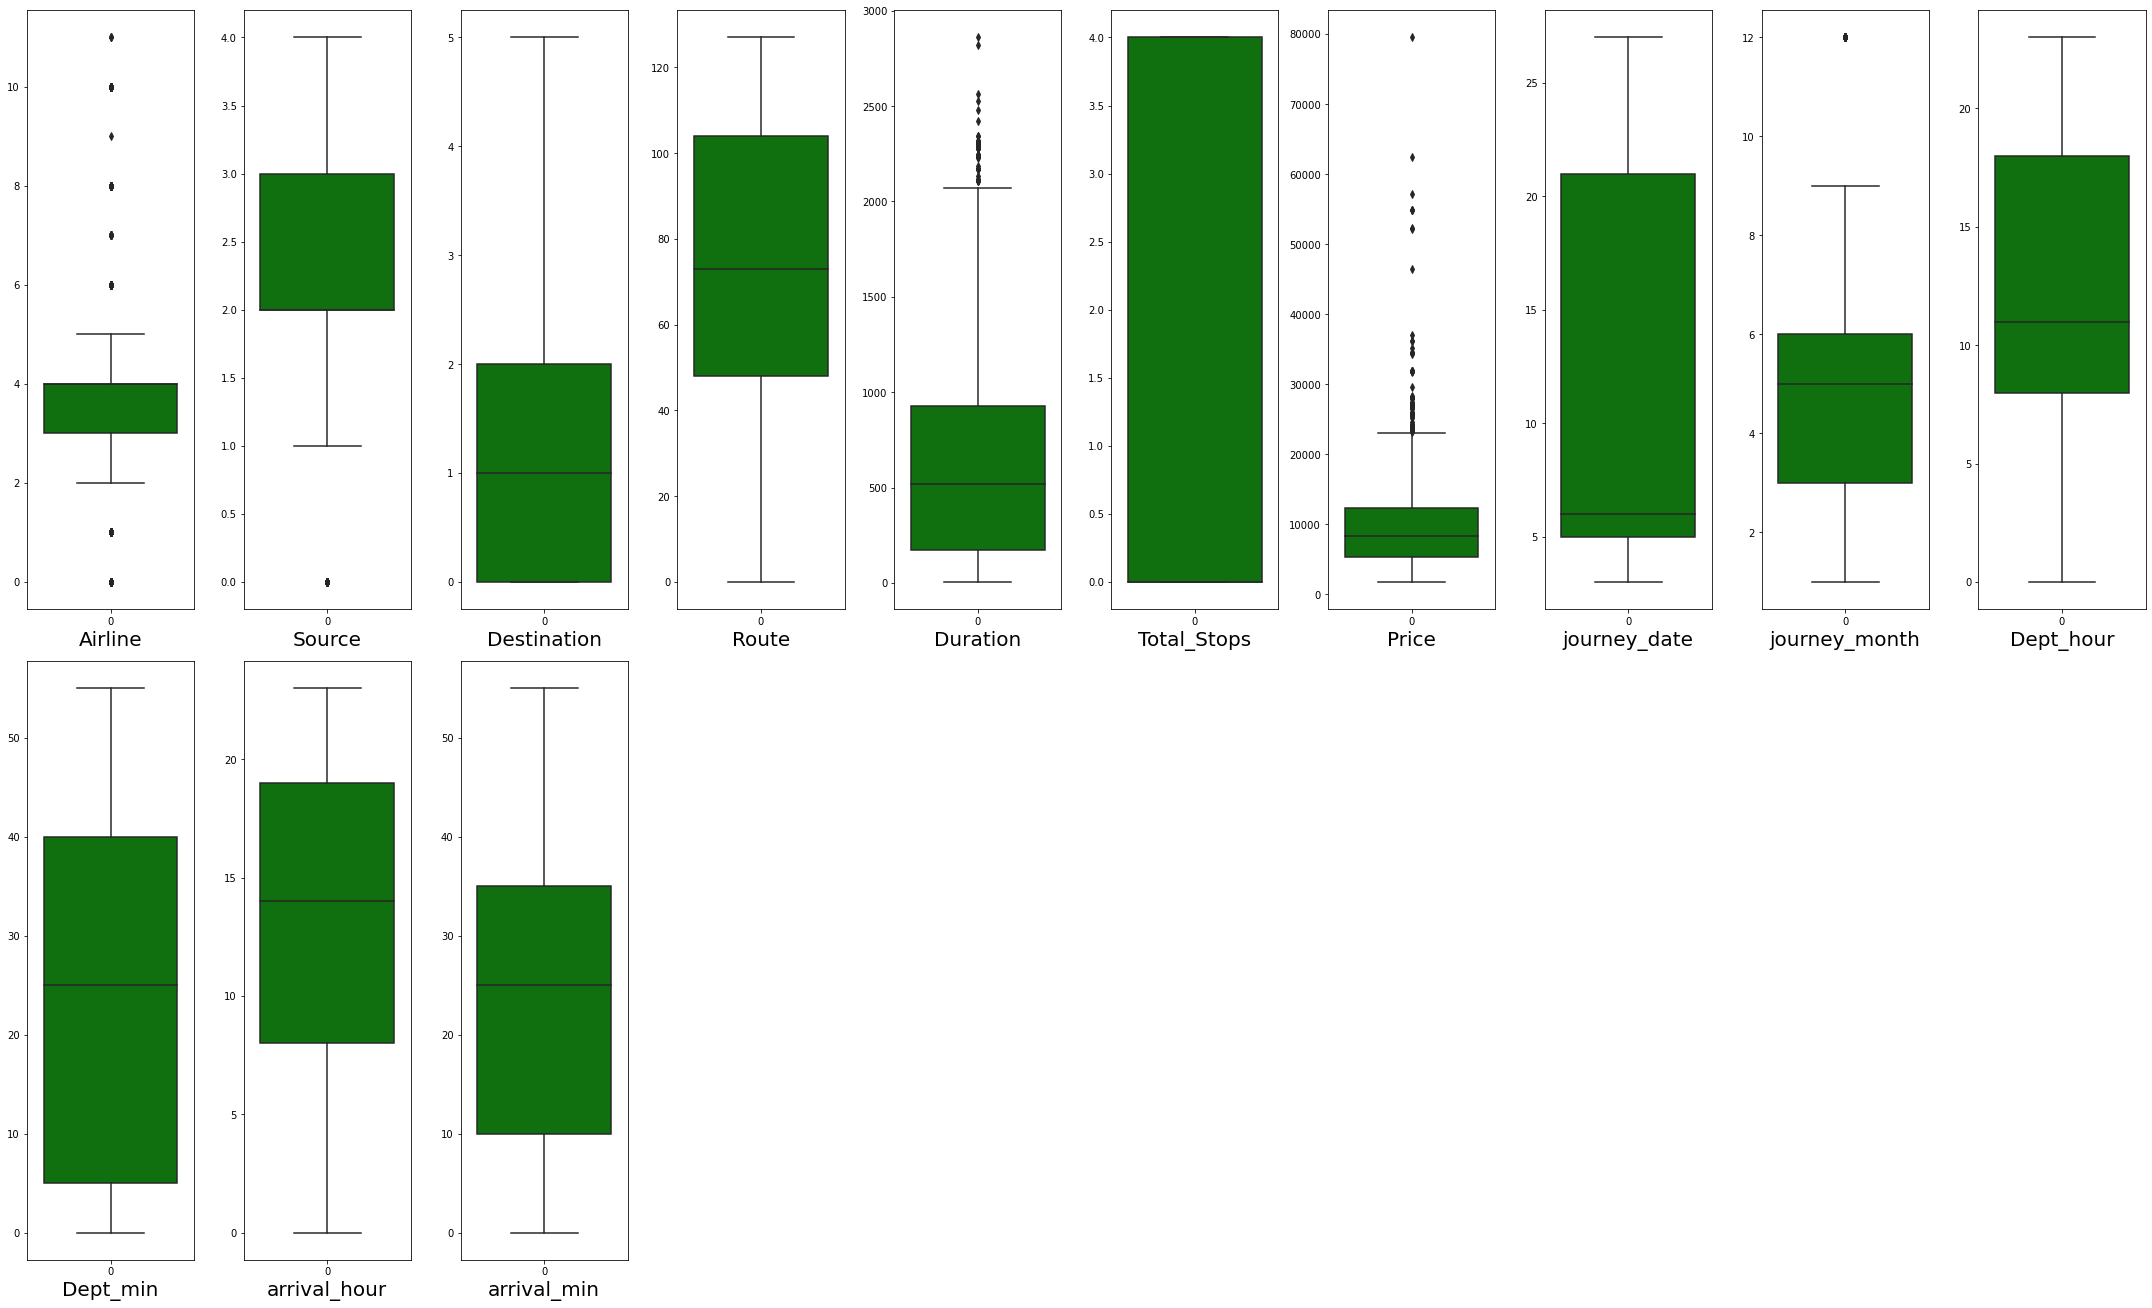

In [14]:
col=df.columns
plt.figure(figsize=(30,90))
for i in range(len(col)):
    plt.subplot(10,10,i+1)
    sns.boxplot(data=df[col[i]],color='green',orient='v')
    plt.xlabel(col[i],fontsize=20)
    plt.tight_layout()

Observation: We could observe outliers in 4 features: Airline, Source,Duration and Price.
        But we would only consider outlier in Duration as Airline and Source are categorical feature and Price is a label so we have to ignore outliers in them.

## Checking Skewness

In [15]:
df.skew()

Airline          0.731057
Source          -0.424023
Destination      1.244046
Route           -0.501911
Duration         0.861411
Total_Stops      0.631532
Price            1.812405
journey_date     0.367212
journey_month    0.629556
Dept_hour        0.112924
Dept_min         0.167234
arrival_hour    -0.370146
arrival_min      0.110945
dtype: float64

Observation: Considering skewness range as -0.5 to 0.5 we could observe skewness in Duration and journey_month.

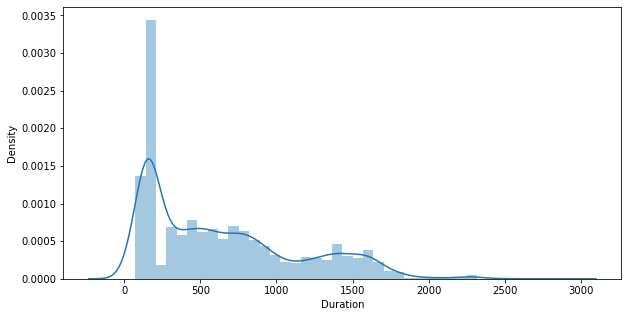

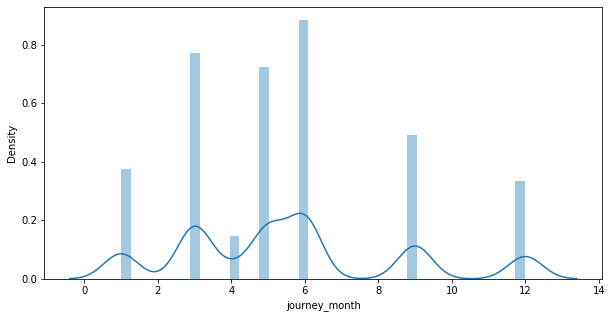

In [16]:
# Ploting Distribution plot to cross check skewness
import warnings
warnings.filterwarnings('ignore')
col=['Duration','journey_month']
# for feature Length
for i in range(2):
    plt.figure(figsize=(10,5))
    sns.distplot(df[col[i]])
    plt.xlabel(col[i],fontsize=10)

Both of these features are skewed.

## Treating outliers

In [43]:
#Getting sure of outliers using z score

z=np.abs(zscore(df['Duration']))
i=np.where(z>3)
print("Outliers index-\n",set(i[0]))
print("\n\nNumber of rows to be eliminated-\n",len(set(i[0])))

Outliers index-
 {3457, 7553, 7306, 9483, 1804, 5516, 10638, 1551, 1657, 7189, 4118, 5782, 8601, 8729, 2718, 9246, 7329, 1442, 10019, 8360, 553, 1067, 6059, 5933, 8621, 4655, 6321, 9395, 7611, 7612, 8127, 7232, 5953, 1346, 7876, 5701, 966, 6085, 9672, 969, 6476, 3790, 4047, 5711, 2641, 9550, 10325, 10455, 1496, 1113, 8153, 8409, 8412, 2654, 226, 7906, 6884, 9702, 3815, 4463, 9847, 2553, 8698, 2172, 3966, 1791}


Number of rows to be eliminated-
 66


In [19]:
df.shape

(10682, 13)

In [44]:
#Calculating Data Loss
loss=((10682-66)/10682)*100
print("The data loss-",100-loss,"%")

The data loss- 0.6178618236285303 %


WE oculd bear with 0.6% loss of data so lets drop these rows.

In [45]:
#removing rows with outliers
df=df.drop(df.index[i[0]])
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,journey_date,journey_month,Dept_hour,Dept_min,arrival_hour,arrival_min
0,3.0,0.0,5.0,18.0,170,4.0,3897,24,3,22,20,1,10
1,1.0,3.0,0.0,84.0,445,1.0,7662,5,1,5,50,13,15
2,4.0,2.0,1.0,118.0,1140,1.0,13882,6,9,9,25,4,25
3,3.0,3.0,0.0,91.0,325,0.0,6218,5,12,18,5,23,30
4,3.0,0.0,5.0,29.0,285,0.0,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,64.0,150,4.0,4107,4,9,19,55,22,25
10679,1.0,3.0,0.0,64.0,155,4.0,4145,27,4,20,45,23,20
10680,4.0,0.0,2.0,18.0,180,4.0,7229,27,4,8,20,11,20
10681,10.0,0.0,5.0,18.0,160,4.0,12648,3,1,11,30,14,10


In [22]:
#checking skewness again
df.skew()

Airline          0.728762
Source          -0.423176
Destination      1.239071
Route           -0.496488
Duration         0.774576
Total_Stops      0.627342
Price            1.824353
journey_date     0.366867
journey_month    0.628240
Dept_hour        0.103647
Dept_min         0.164757
arrival_hour    -0.361408
arrival_min      0.107806
dtype: float64

Skewness still exists in Duration so lets treat it.

## Treating skewness

In [50]:
#using yeo-johnson transformation
df['Duration']=power_transform(df[['Duration']].to_numpy().reshape(-1,1),method='yeo-johnson')
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,journey_date,journey_month,Dept_hour,Dept_min,arrival_hour,arrival_min
0,3.0,0.0,5.0,18.0,-1.058987,4.0,3897,24,3,22,20,1,10
1,1.0,3.0,0.0,84.0,-0.050628,1.0,7662,5,1,5,50,13,15
2,4.0,2.0,1.0,118.0,1.066294,1.0,13882,6,9,9,25,4,25
3,3.0,3.0,0.0,91.0,-0.394137,0.0,6218,5,12,18,5,23,30
4,3.0,0.0,5.0,29.0,-0.533541,0.0,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,64.0,-1.180901,4.0,4107,4,9,19,55,22,25
10679,1.0,3.0,0.0,64.0,-1.149160,4.0,4145,27,4,20,45,23,20
10680,4.0,0.0,2.0,18.0,-1.002626,4.0,7229,27,4,8,20,11,20
10681,10.0,0.0,5.0,18.0,-1.118294,4.0,12648,3,1,11,30,14,10


## Standardization

In [132]:
x=df.drop(['Price'],axis=1)
y=df['Price']

In [133]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-0.41638919, -1.65496085,  2.41295825, ..., -0.23579306,
        -1.79479243, -0.88916429],
       [-1.2670363 ,  0.8880862 , -0.97297835, ...,  1.36283116,
        -0.04610831, -0.58643608],
       [ 0.00893436,  0.04040385, -0.29579103, ...,  0.03064431,
        -1.3576214 ,  0.01902032],
       ...,
       [ 0.00893436, -1.65496085,  0.38139629, ..., -0.23579306,
        -0.33755566, -0.28370788],
       [ 2.56087567, -1.65496085,  2.41295825, ...,  0.29708168,
         0.09961537, -0.88916429],
       [-1.2670363 ,  0.04040385, -0.29579103, ...,  1.62926852,
         0.82823375, -0.58643608]])

## Train test split

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
max_ac=0
randomState=0
lr=LinearRegression()
for i in range(500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("\n\nAt random state:",i)
        print("\nTrain Accuracy- ",round(r2_score(y_train,pred_train)*100,1))
        print("\nTest Accuracy- ",round(r2_score(y_test,pred_test)*100,1))
        if round(r2_score(y_test,pred_test)*100,1)>max_ac:
            randomState=i
            max_ac=round(r2_score(y_test,pred_test)*100,1)
print("\n\n Best accuracy at random state-",randomState)



At random state: 9

Train Accuracy-  43.0

Test Accuracy-  43.0


At random state: 35

Train Accuracy-  43.0

Test Accuracy-  43.0


At random state: 393

Train Accuracy-  43.0

Test Accuracy-  43.0


At random state: 407

Train Accuracy-  43.0

Test Accuracy-  43.0


 Best accuracy at random state- 9


## Linear Regression

In [135]:
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=9,test_size=0.20)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
lr_train_acc=round(r2_score(y_train,pred_train)*100,1)
lr_test_acc=round(r2_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",lr_train_acc)
print("\nTest Accuracy- ",lr_test_acc)


Train Accuracy-  43.0

Test Accuracy-  43.0


## Cross Validation Score

In [33]:
for i in range(2,20):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",lr_test_acc)



At cv- 2

 cross validation score is- 42.896014798661525

 Accuracy score is- 43.0


At cv- 3

 cross validation score is- 42.90251507954766

 Accuracy score is- 43.0


At cv- 4

 cross validation score is- 42.90827646283644

 Accuracy score is- 43.0


At cv- 5

 cross validation score is- 42.916090408104765

 Accuracy score is- 43.0


At cv- 6

 cross validation score is- 43.00547541298127

 Accuracy score is- 43.0


At cv- 7

 cross validation score is- 43.05035635307675

 Accuracy score is- 43.0


At cv- 8

 cross validation score is- 42.98752369381484

 Accuracy score is- 43.0


At cv- 9

 cross validation score is- 43.106102312456365

 Accuracy score is- 43.0


At cv- 10

 cross validation score is- 43.233310956656574

 Accuracy score is- 43.0


At cv- 11

 cross validation score is- 43.145059301317026

 Accuracy score is- 43.0


At cv- 12

 cross validation score is- 43.09071554417955

 Accuracy score is- 43.0


At cv- 13

 cross validation score is- 43.2600642089149

 Accuracy

Best validation score is at cv=5

In [55]:
cv_score_best_lr=cross_val_score(lr,x,y,cv=5).mean()*100
print("cross validation score is-",cv_score_best_lr)
print("accuracy score for linear regression model is-",lr_test_acc)

cross validation score is- 42.916090408104765
accuracy score for linear regression model is- 43.0


## Calculating RMSE,MAE,MSE Errors

In [58]:
lr_rmse=np.sqrt(mean_squared_error(y_test, pred_test))
lr_mae=mean_absolute_error(y_test, pred_test)
lr_mse=mean_squared_error(y_test,pred_test)
print("RMSE::",np.sqrt(mean_squared_error(y_test, pred_test)))
print("MAE::",mean_absolute_error(y_test, pred_test))
print("MSE::",mean_squared_error(y_test,pred_test))

RMSE:: 3361.414390896239
MAE:: 2485.8731240993225
MSE:: 11299106.707324333


## Random Forest Regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
max_ac=0
randomState=0

for i in range(20):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    
    print("\n\nAt random state:",i)
    print("\nTrain Accuracy- ",round(r2_score(y_train,pred_train)*100,1))
    print("\nTest Accuracy- ",round(r2_score(y_test,pred_test)*100,1))
        
print("\n\n Best accuracy at random state-",randomState)



At random state: 0

Train Accuracy-  95.2

Test Accuracy-  80.2


At random state: 1

Train Accuracy-  95.1

Test Accuracy-  76.5


At random state: 2

Train Accuracy-  95.1

Test Accuracy-  78.3


At random state: 3

Train Accuracy-  95.0

Test Accuracy-  78.5


At random state: 4

Train Accuracy-  95.0

Test Accuracy-  75.8


At random state: 5

Train Accuracy-  95.1

Test Accuracy-  79.5


At random state: 6

Train Accuracy-  95.1

Test Accuracy-  74.9


At random state: 7

Train Accuracy-  95.0

Test Accuracy-  79.7


At random state: 8

Train Accuracy-  95.1

Test Accuracy-  78.7


At random state: 9

Train Accuracy-  94.9

Test Accuracy-  81.9


At random state: 10

Train Accuracy-  95.1

Test Accuracy-  80.2


At random state: 11

Train Accuracy-  95.3

Test Accuracy-  77.6


At random state: 12

Train Accuracy-  95.0

Test Accuracy-  82.6


At random state: 13

Train Accuracy-  95.4

Test Accuracy-  74.2


At random state: 14

Train Accuracy-  95.1

Test Accuracy-  76.8


At 

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,test_size=0.20)
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
rf_train_acc=round(r2_score(y_train,pred_train)*100,1)
rf_test_acc=round(r2_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",rf_train_acc)
print("\nTest Accuracy- ",rf_test_acc)


Train Accuracy-  94.9

Test Accuracy-  82.5


## Cross validation Score

In [61]:
for i in range(4,23):
    cv_score=cross_val_score(rf,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",rf_test_acc)



At cv- 4

 cross validation score is- 78.24757114066372

 Accuracy score is- 82.5


At cv- 5

 cross validation score is- 78.78706336651065

 Accuracy score is- 82.5


At cv- 6

 cross validation score is- 78.6280086955138

 Accuracy score is- 82.5


At cv- 7

 cross validation score is- 78.54409578639014

 Accuracy score is- 82.5


At cv- 8

 cross validation score is- 78.59001662322058

 Accuracy score is- 82.5


At cv- 9

 cross validation score is- 78.88006033239799

 Accuracy score is- 82.5


At cv- 10

 cross validation score is- 79.08120783131929

 Accuracy score is- 82.5


At cv- 11

 cross validation score is- 78.44112452306467

 Accuracy score is- 82.5


At cv- 12

 cross validation score is- 78.69950603286907

 Accuracy score is- 82.5


At cv- 13

 cross validation score is- 78.9693710374065

 Accuracy score is- 82.5


At cv- 14

 cross validation score is- 78.68554744155753

 Accuracy score is- 82.5


At cv- 15

 cross validation score is- 78.70730112885468

 Accuracy sco

Best cross validation score is at cv=10

In [63]:
cv_score_best_rf=cross_val_score(rf,x,y,cv=10).mean()*100
print("cross validation score is-",cv_score_best_rf)
print("accuracy score for random forest regression model is-",rf_test_acc)

cross validation score is- 79.15621882618576
accuracy score for random forest regression model is- 82.5


## Calculating RMSE,MAE,MSE Errors

In [64]:
rf_rmse=np.sqrt(mean_squared_error(y_test, pred_test))
rf_mae=mean_absolute_error(y_test, pred_test)
rf_mse=mean_squared_error(y_test,pred_test)
print("RMSE::",np.sqrt(mean_squared_error(y_test, pred_test)))
print("MAE::",mean_absolute_error(y_test, pred_test))
print("MSE::",mean_squared_error(y_test,pred_test))

RMSE:: 1901.1231390591577
MAE:: 1157.286655439925
MSE:: 3614269.189866145


## Knn Regressor

In [78]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.20)
knn.fit(x_train,y_train)
knn_pred_train=knn.predict(x_train)
knn_pred_test=knn.predict(x_test)
knn_acc_train=r2_score(y_train,knn_pred_train)
knn_acc_test=r2_score(y_test,knn_pred_test)
print("acc train",knn_acc_train*100)
print("acc test",knn_acc_test*100)

acc train 79.19872394522083
acc test 71.68147130510627


## Cross Validation Score

In [80]:
for i in range(10,25):
    cv_score=cross_val_score(knn,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",knn_acc_test*100)



At cv- 10

 cross validation score is- 69.65030955344999

 Accuracy score is- 71.68147130510627


At cv- 11

 cross validation score is- 69.34782815304241

 Accuracy score is- 71.68147130510627


At cv- 12

 cross validation score is- 69.32586690881583

 Accuracy score is- 71.68147130510627


At cv- 13

 cross validation score is- 69.46913793262391

 Accuracy score is- 71.68147130510627


At cv- 14

 cross validation score is- 69.58706498915147

 Accuracy score is- 71.68147130510627


At cv- 15

 cross validation score is- 69.44564610396048

 Accuracy score is- 71.68147130510627


At cv- 16

 cross validation score is- 69.69482359808708

 Accuracy score is- 71.68147130510627


At cv- 17

 cross validation score is- 69.50892913528253

 Accuracy score is- 71.68147130510627


At cv- 18

 cross validation score is- 69.47630619539763

 Accuracy score is- 71.68147130510627


At cv- 19

 cross validation score is- 69.56836369107347

 Accuracy score is- 71.68147130510627


At cv- 20

 cross 

So we are getting the least difference between cross_val_score and accuracy score at cv=14

In [81]:
cv_score_best_knn=cross_val_score(knn,x,y,cv=14).mean()*100
print("cross validation score is-",cv_score_best_knn)
print("accuracy score for K Nearest classifier model is-",knn_acc_test*100)

cross validation score is- 69.58706498915147
accuracy score for K Nearest classifier model is- 71.68147130510627


## Calculating RMSE,MAE,MSE Errors

In [82]:
knn_rmse=np.sqrt(mean_squared_error(y_test, knn_pred_test))
knn_mae=mean_absolute_error(y_test, knn_pred_test)
knn_mse=mean_squared_error(y_test,knn_pred_test)
print("RMSE::",np.sqrt(mean_squared_error(y_test, knn_pred_test)))
print("MAE::",mean_absolute_error(y_test, knn_pred_test))
print("MSE::",mean_squared_error(y_test,knn_pred_test))

RMSE:: 2303.1421968901627
MAE:: 1592.5442561205273
MSE:: 5304463.979096046


## XGBoost Regressor

In [88]:
from xgboost import XGBRegressor
xgmod=XGBRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.20)
xgmod.fit(x_train,y_train)
pred_train=xgmod.predict(x_train)
pred_test=xgmod.predict(x_test)
xg_train_acc=round(r2_score(y_train,pred_train)*100,1)
xg_test_acc=round(r2_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",xg_train_acc)
print("\nTest Accuracy- ",xg_test_acc)


Train Accuracy-  93.9

Test Accuracy-  86.1


## Cross Validation Score

In [94]:
cv_score_best_xg=cross_val_score(xgmod,x,y,cv=20).mean()*100
print("cross validation score is-",cv_score_best_xg)
print("accuracy score for Knn classifier model is-",xg_test_acc)

cross validation score is- 84.52204093082216
accuracy score for Knn classifier model is- 86.1


## Calculating RMSE,MAE,MSE Errors

In [95]:
xgb_rmse=np.sqrt(mean_squared_error(y_test, pred_test))
xgb_mae=mean_absolute_error(y_test, pred_test)
xgb_mse=mean_squared_error(y_test,pred_test)
print("RMSE::",np.sqrt(mean_squared_error(y_test, pred_test)))
print("MAE::",mean_absolute_error(y_test, pred_test))
print("MSE::",mean_squared_error(y_test,pred_test))

RMSE:: 1743.4606424735375
MAE:: 1153.8514893382733
MSE:: 3039655.01185424


## Model Summary

In [96]:
models=['Linear Regression','Random Forest Regressor','Knn Regressor','XGBoost']
test_acc=[lr_test_acc,rf_test_acc,knn_acc_test*100,xg_test_acc]
cv_score=[cv_score_best_lr,cv_score_best_rf,cv_score_best_knn,cv_score_best_xg]
rmse=[lr_rmse,rf_rmse,knn_rmse,xgb_rmse]
mae=[lr_mae,rf_mae,knn_mae,xgb_mae]
mse=[lr_mse,rf_mse,knn_mse,xgb_mse]
dfm=pd.DataFrame(list(zip(models,test_acc,cv_score,rmse,mae,mse)),columns=['Models','Test Accuracy','CV Score','RMSE','MAE','MSE'])
dfm

,Models,Test Accuracy,CV Score,RMSE,MAE,MSE
0,Linear Regression,43.000000,42.916090,3361.414391,2485.873124,1.129911e+07
1,Random Forest Regressor,82.500000,79.156219,1901.123139,1157.286655,3.614269e+06
2,Knn Regressor,71.681471,69.587065,2303.142197,1592.544256,5.304464e+06
3,XGBoost,86.100000,84.522041,1743.460642,1153.851489,3.039655e+06


Looking at the above table we conclude that the best performing model is XGBoost because it has best test accuracy among all and the difference between accuracy and cv score is also least. This model is giving minimum errors as compared to others. So we would try to improve its accuracy by performing hyper parameter tuning.

## Hyperparameter tuning on XGBoost Regressor

In [97]:
xgb=XGBRegressor()
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

xgbt = GridSearchCV(estimator=xgb, n_jobs=-1, param_grid=params, cv=3)
xgbt.fit(x_train, y_train)

xgbt.best_params_

{'base_score': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'n_estimators': 200,
 'reg_alpha': 1,
 'reg_lambda': 1}

In [111]:
xgb=XGBRegressor(base_score= 0.5,
 gamma= 0,
 learning_rate= 0.1,
 n_estimators= 250,
 reg_alpha= 1,
 reg_lambda= 1)
xgb.fit(x_train,y_train)
pred_train=xgb.predict(x_train)
pred_test=xgb.predict(x_test)
train_acc=round(r2_score(y_train,pred_train)*100,1)
test_acc=round(r2_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",train_acc)
print("\nTest Accuracy- ",test_acc)


Train Accuracy-  93.3

Test Accuracy-  85.0


Accuracy didnot increase so we will stick and save our previous XGBoost regressor model.

In [112]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(xgmod, open(filename, 'wb'))

## Testing Data

In [115]:
dtest=pd.read_csv(r"C:\Users\user\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Test_set.csv")
dtest

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info


In [116]:
# checking nulls
dtest.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [117]:
#Date_of_Journey
dtest['Date_of_Journey']=pd.to_datetime(dtest['Date_of_Journey'])
dtest['journey_date'] = dtest['Date_of_Journey'].dt.day
dtest['journey_month'] = dtest['Date_of_Journey'].dt.month
dtest=dtest.drop(['Date_of_Journey'],axis=1)
dtest.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,journey_date,journey_month
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info,5,12
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [118]:
#Dep_Time
dtest['Dep_Time']=pd.to_datetime(dtest['Dep_Time'])
dtest['Dept_hour'] = dtest['Dep_Time'].dt.hour
dtest['Dept_min'] = dtest['Dep_Time'].dt.minute
dtest=dtest.drop(['Dep_Time'],axis=1)
#Arrival_Time
dtest['Arrival_Time']=pd.to_datetime(dtest['Arrival_Time'])
dtest['arrival_hour'] = dtest['Arrival_Time'].dt.hour
dtest['arrival_min'] = dtest['Arrival_Time'].dt.minute
dtest=dtest.drop(['Arrival_Time'],axis=1)
dtest

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,journey_date,journey_month,Dept_hour,Dept_min,arrival_hour,arrival_min
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,4h,1 stop,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,2h 50m,non-stop,No info,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU ? DEL ? BLR,23h 55m,1 stop,No info,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU ? BLR,2h 35m,non-stop,No info,27,3,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,6h 35m,1 stop,No info,3,6,21,50,4,25
2669,Air India,Delhi,Cochin,DEL ? BOM ? COK,15h 15m,1 stop,No info,3,6,4,0,19,15


In [119]:
#Duration
dtest['Duration']=dtest['Duration'].str.replace("h","*60")
dtest['Duration']=dtest['Duration'].str.replace("m","*1")
dtest['Duration']=dtest['Duration'].str.replace(" ","+")
dtest['Duration']=dtest['Duration'].apply(eval)
dtest

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,journey_date,journey_month,Dept_hour,Dept_min,arrival_hour,arrival_min
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,655,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,240,1 stop,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,1425,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,780,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,170,non-stop,No info,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU ? DEL ? BLR,1435,1 stop,No info,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU ? BLR,155,non-stop,No info,27,3,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,395,1 stop,No info,3,6,21,50,4,25
2669,Air India,Delhi,Cochin,DEL ? BOM ? COK,915,1 stop,No info,3,6,4,0,19,15


## Encoding

In [120]:
category=['Airline','Source','Destination','Route','Total_Stops','Additional_Info']
oe=OrdinalEncoder()
for i in category:
    df1=oe.fit_transform(dtest[[i]])
    dtest[i]=df1
dtest

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,journey_date,journey_month,Dept_hour,Dept_min,arrival_hour,arrival_min
0,4.0,2.0,1.0,76.0,655,0.0,5.0,6,6,17,30,4,25
1,3.0,3.0,0.0,65.0,240,0.0,5.0,5,12,6,20,10,20
2,4.0,2.0,1.0,76.0,1425,0.0,3.0,21,5,19,15,19,0
3,6.0,2.0,1.0,76.0,780,0.0,5.0,21,5,8,0,21,0
4,0.0,0.0,2.0,16.0,170,4.0,5.0,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1.0,3.0,0.0,51.0,1435,0.0,5.0,6,6,20,30,20,25
2667,3.0,3.0,0.0,43.0,155,4.0,5.0,27,3,14,20,16,55
2668,4.0,2.0,1.0,76.0,395,0.0,5.0,3,6,21,50,4,25
2669,1.0,2.0,1.0,76.0,915,0.0,5.0,3,6,4,0,19,15


In [121]:
#Dropping Additional_Info to remove multicollinearity
dtest=dtest.drop(['Additional_Info'],axis=1)
dtest

,Airline,Source,Destination,Route,Duration,Total_Stops,journey_date,journey_month,Dept_hour,Dept_min,arrival_hour,arrival_min
0,4.0,2.0,1.0,76.0,655,0.0,6,6,17,30,4,25
1,3.0,3.0,0.0,65.0,240,0.0,5,12,6,20,10,20
2,4.0,2.0,1.0,76.0,1425,0.0,21,5,19,15,19,0
3,6.0,2.0,1.0,76.0,780,0.0,21,5,8,0,21,0
4,0.0,0.0,2.0,16.0,170,4.0,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1.0,3.0,0.0,51.0,1435,0.0,6,6,20,30,20,25
2667,3.0,3.0,0.0,43.0,155,4.0,27,3,14,20,16,55
2668,4.0,2.0,1.0,76.0,395,0.0,3,6,21,50,4,25
2669,1.0,2.0,1.0,76.0,915,0.0,3,6,4,0,19,15


## Checking outliers

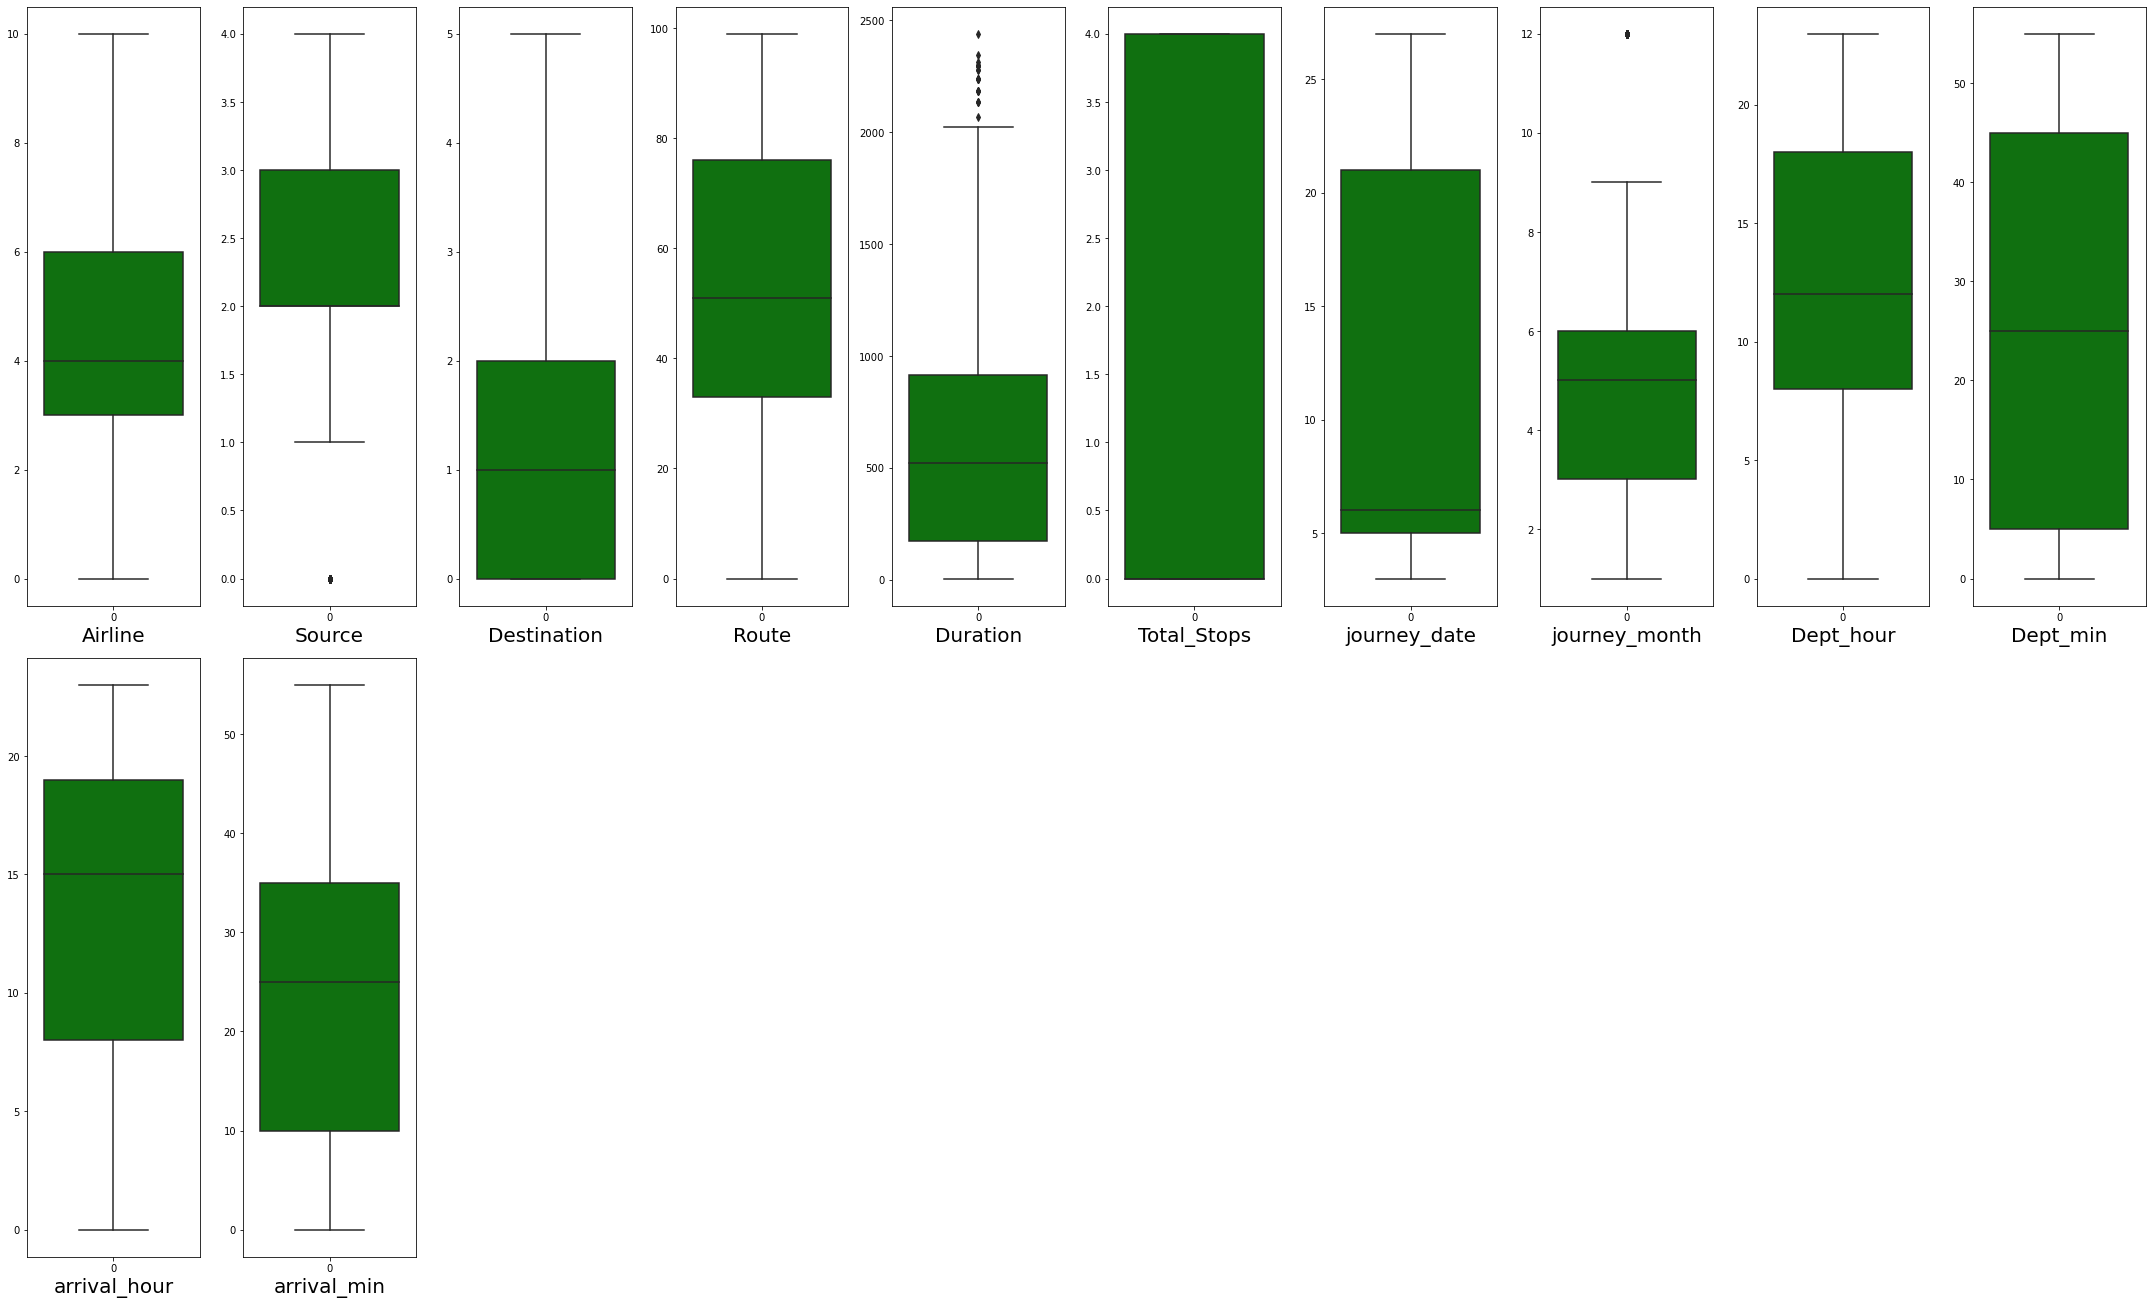

In [122]:
col=dtest.columns
plt.figure(figsize=(30,90))
for i in range(len(col)):
    plt.subplot(10,10,i+1)
    sns.boxplot(data=dtest[col[i]],color='green',orient='v')
    plt.xlabel(col[i],fontsize=20)
    plt.tight_layout()

## Treating outliers

In [125]:
#Getting sure of outliers using z score

z=np.abs(zscore(dtest['Duration']))
i=np.where(z>3)
print("Outliers index-\n",set(i[0]))
print("\n\nNumber of rows to be eliminated-\n",len(set(i[0])))

Outliers index-
 {2114, 1379, 1511, 2472, 786, 1554, 1918, 1781, 1022, 1271, 1686, 1689, 1945, 251, 2492, 2359, 510, 1279}


Number of rows to be eliminated-
 18


In [126]:
#removing rows with outliers
dtest=dtest.drop(dtest.index[i[0]])
dtest

,Airline,Source,Destination,Route,Duration,Total_Stops,journey_date,journey_month,Dept_hour,Dept_min,arrival_hour,arrival_min
0,4.0,2.0,1.0,76.0,655,0.0,6,6,17,30,4,25
1,3.0,3.0,0.0,65.0,240,0.0,5,12,6,20,10,20
2,4.0,2.0,1.0,76.0,1425,0.0,21,5,19,15,19,0
3,6.0,2.0,1.0,76.0,780,0.0,21,5,8,0,21,0
4,0.0,0.0,2.0,16.0,170,4.0,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1.0,3.0,0.0,51.0,1435,0.0,6,6,20,30,20,25
2667,3.0,3.0,0.0,43.0,155,4.0,27,3,14,20,16,55
2668,4.0,2.0,1.0,76.0,395,0.0,3,6,21,50,4,25
2669,1.0,2.0,1.0,76.0,915,0.0,3,6,4,0,19,15


In [127]:
dtest.skew()

Airline          0.479556
Source          -0.424625
Destination      1.258283
Route           -0.275414
Duration         0.809826
Total_Stops      0.667299
journey_date     0.475210
journey_month    0.591565
Dept_hour        0.083357
Dept_min         0.132681
arrival_hour    -0.432551
arrival_min      0.110111
dtype: float64

In [128]:
#using yeo-johnson transformation
dtest['Duration']=power_transform(dtest[['Duration']].to_numpy().reshape(-1,1),method='yeo-johnson')
dtest

,Airline,Source,Destination,Route,Duration,Total_Stops,journey_date,journey_month,Dept_hour,Dept_min,arrival_hour,arrival_min
0,4.0,2.0,1.0,76.0,0.387475,0.0,6,6,17,30,4,25
1,3.0,3.0,0.0,65.0,-0.724050,0.0,5,12,6,20,10,20
2,4.0,2.0,1.0,76.0,1.374438,0.0,21,5,19,15,19,0
3,6.0,2.0,1.0,76.0,0.599082,0.0,21,5,8,0,21,0
4,0.0,0.0,2.0,16.0,-1.067436,4.0,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1.0,3.0,0.0,51.0,1.383863,0.0,6,6,20,30,20,25
2667,3.0,3.0,0.0,43.0,-1.156297,4.0,27,3,14,20,16,55
2668,4.0,2.0,1.0,76.0,-0.194054,0.0,3,6,21,50,4,25
2669,1.0,2.0,1.0,76.0,0.797523,0.0,3,6,4,0,19,15


In [137]:
scaler=StandardScaler()
x=scaler.fit_transform(dtest)
x

array([[ 0.00460462,  0.03144034, -0.29456179, ...,  0.2724454 ,
        -1.3548183 ,  0.02559072],
       [-0.43168311,  0.87397799, -0.9752869 , ..., -0.25246212,
        -0.50321517, -0.27218199],
       [ 0.00460462,  0.03144034, -0.29456179, ..., -0.51491588,
         0.77418953, -1.46327281],
       ...,
       [ 0.00460462,  0.03144034, -0.29456179, ...,  1.32226045,
        -1.3548183 ,  0.02559072],
       [-1.30425857,  0.03144034, -0.29456179, ..., -1.30227716,
         0.77418953, -0.56995469],
       [ 0.87718008,  0.03144034, -0.29456179, ...,  1.58471421,
         0.77418953, -0.56995469]])

## Applying model

In [138]:
pred_train=xgmod.predict(x)

In [139]:
print(pred_train)

[11206.845   4702.725  13625.636  ... 15799.578  13659.456   7428.9053]


In [140]:
dtest['Price']=pred_train
dtest

,Airline,Source,Destination,Route,Duration,Total_Stops,journey_date,journey_month,Dept_hour,Dept_min,arrival_hour,arrival_min,Price
0,4.0,2.0,1.0,76.0,0.387475,0.0,6,6,17,30,4,25,11206.844727
1,3.0,3.0,0.0,65.0,-0.724050,0.0,5,12,6,20,10,20,4702.725098
2,4.0,2.0,1.0,76.0,1.374438,0.0,21,5,19,15,19,0,13625.635742
3,6.0,2.0,1.0,76.0,0.599082,0.0,21,5,8,0,21,0,10619.092773
4,0.0,0.0,2.0,16.0,-1.067436,4.0,24,6,23,55,2,45,3663.115723
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1.0,3.0,0.0,51.0,1.383863,0.0,6,6,20,30,20,25,8037.603027
2667,3.0,3.0,0.0,43.0,-1.156297,4.0,27,3,14,20,16,55,4907.356934
2668,4.0,2.0,1.0,76.0,-0.194054,0.0,3,6,21,50,4,25,15799.578125
2669,1.0,2.0,1.0,76.0,0.797523,0.0,3,6,4,0,19,15,13659.456055
